# Breast cancer prediction
### steps:
1. Importing libraries
2. Data collection
3. Data Exploration
4. Data preprocessing
5. Featuring engineering
6. Train Test Split
7. Model selection
8. Model Training
9. Model evaluation
10. Prediction

### 1. Importing required libraries

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression   
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings("ignore")

### 2. Data collection
dataset link - https://www.kaggle.com/code/buddhiniw/breast-cancer-prediction/input

In [34]:
df = pd.read_csv("Breast_cancer_prediction_data.csv")

### 3. Data exploration

In [35]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


### 4. Data Preprocessing

In [36]:
df.drop("id",axis=1,inplace=True)
df.drop("Unnamed: 32",axis=1,inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [38]:
df["diagnosis"].unique()

array(['M', 'B'], dtype=object)

In [39]:
df["diagnosis"]=df["diagnosis"].map({'M':1,'B':0})

In [40]:
df.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [41]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


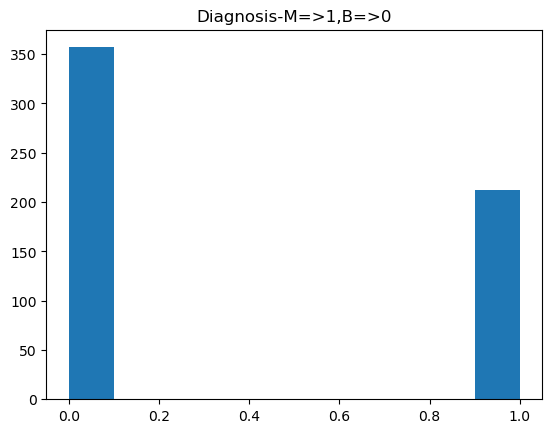

In [42]:
plt.hist(df["diagnosis"])
plt.title("Diagnosis-M=>1,B=>0")
plt.show()

### 5. Feature engineering

In [43]:
features_mean=list(df.columns[1:11])
features_mean

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']

In [44]:
x=df[features_mean]

In [45]:
y=df["diagnosis"]

In [46]:
def calculate_mutual_information(X, y):
    mutual_info_values = mutual_info_regression(X, y)
    return mutual_info_values

This function will caluclate the mutual information that provided by each feature. 

In [47]:
mutual_info_values = calculate_mutual_information(x,y)
for i, feature in enumerate(x.columns):
    print(f"Mutual Information for {feature}: {mutual_info_values[i]}")
    

Mutual Information for radius_mean: 0.3658751229699986
Mutual Information for texture_mean: 0.09556694040581792
Mutual Information for perimeter_mean: 0.4056234896469668
Mutual Information for area_mean: 0.3571855860976383
Mutual Information for smoothness_mean: 0.08261768328595576
Mutual Information for compactness_mean: 0.21314766295134557
Mutual Information for concavity_mean: 0.3702562752048735
Mutual Information for concave points_mean: 0.4371699717558588
Mutual Information for symmetry_mean: 0.06439536227665688
Mutual Information for fractal_dimension_mean: 0.0035069788563042437


C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

#### Observations:
From the mutual information we can select the feature like : 'radius_mean','perimeter_mean','area_mean','compactness_mean','concavity_mean','concave points_mean'
for prediction of diagnosis

In [48]:
col = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concavity_mean','concave points_mean','diagnosis']
data = df[col]

In [49]:
def creating_corr_heatmap(data,method = 'pearson',figsize=(10, 8)):
    corr_matrix  = data.corr()
    plt.figure(figsize=figsize)
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title(f'Correlation Heatmap ({method.capitalize()} correlation)')
    plt.show()
    return corr_matrix

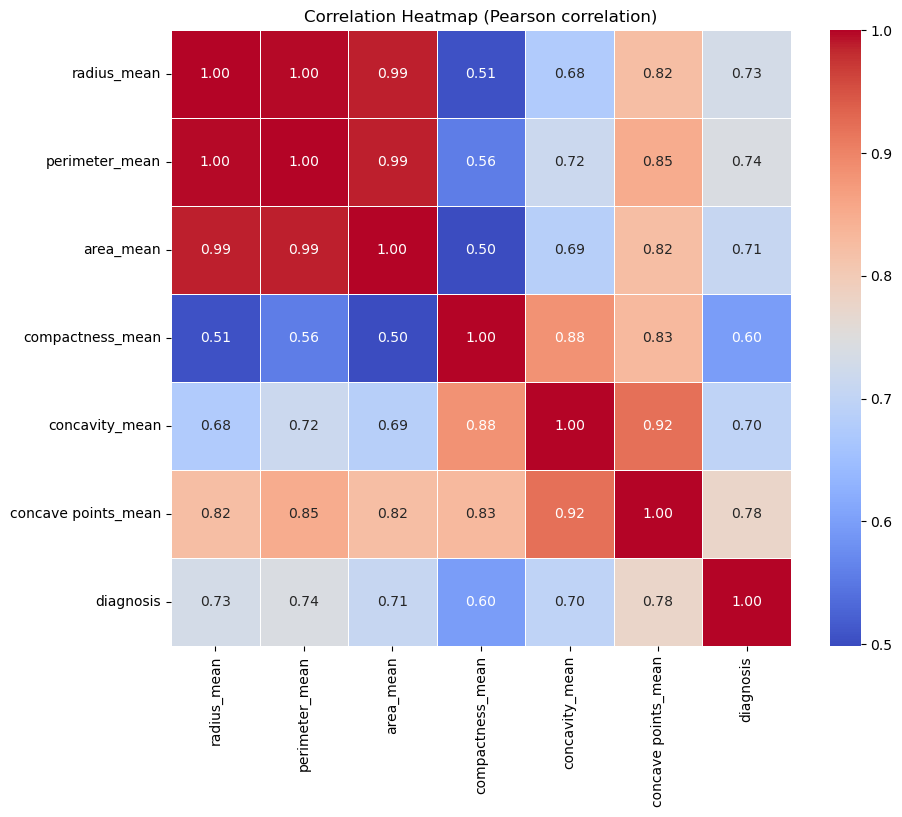

In [50]:
correlation_matrix = creating_corr_heatmap(data)

#### Obsevations : 
From the above heatmap we can draw a conclusion that caonsidered features are best to predict the diagnosis column

### 6. Train Test Split

In [55]:
train_df,test_df = train_test_split(df,test_size=0.3)

In [78]:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(n_splits=5,shuffle=True,random_state=42)
  error = []
  for train, test in kf.split(data):
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
    
    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    
  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome])

In [82]:
predictor_var = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']
outcome_var='diagnosis'
model=LogisticRegression()
classification_model(model,train_df,predictor_var,outcome_var)

Accuracy : 89.950%
Cross-Validation Score : 92.500%
Cross-Validation Score : 91.875%
Cross-Validation Score : 90.417%
Cross-Validation Score : 89.964%
Cross-Validation Score : 89.440%


In [83]:
predictor_var = ['radius_mean']
model=LogisticRegression()
classification_model(model,train_df,predictor_var,outcome_var)

Accuracy : 88.693%
Cross-Validation Score : 95.000%
Cross-Validation Score : 91.250%
Cross-Validation Score : 90.000%
Cross-Validation Score : 88.386%
Cross-Validation Score : 88.177%


In [85]:
predictor_var = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']
model = DecisionTreeClassifier()
classification_model(model,train_df,predictor_var,outcome_var)


Accuracy : 100.000%
Cross-Validation Score : 88.750%
Cross-Validation Score : 90.625%
Cross-Validation Score : 89.583%
Cross-Validation Score : 87.441%
Cross-Validation Score : 87.421%


In [86]:
predictor_var = ['radius_mean']
model = DecisionTreeClassifier()
classification_model(model,train_df,predictor_var,outcome_var)

Accuracy : 96.985%
Cross-Validation Score : 86.250%
Cross-Validation Score : 85.000%
Cross-Validation Score : 83.333%
Cross-Validation Score : 84.019%
Cross-Validation Score : 84.684%


In [87]:
predictor_var = features_mean
model = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7, max_features=2)
classification_model(model, train_df,predictor_var,outcome_var)

Accuracy : 95.980%
Cross-Validation Score : 92.500%
Cross-Validation Score : 93.750%
Cross-Validation Score : 92.917%
Cross-Validation Score : 93.422%
Cross-Validation Score : 92.712%


In [88]:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print(featimp)

concave points_mean       0.234563
perimeter_mean            0.202287
radius_mean               0.161026
concavity_mean            0.141294
area_mean                 0.108706
texture_mean              0.051745
compactness_mean          0.048938
smoothness_mean           0.028132
symmetry_mean             0.012729
fractal_dimension_mean    0.010582
dtype: float64


In [89]:
predictor_var = ['concave points_mean','area_mean','radius_mean','perimeter_mean','concavity_mean',]
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=2)
classification_model(model,train_df,predictor_var,outcome_var)

Accuracy : 94.221%
Cross-Validation Score : 91.250%
Cross-Validation Score : 92.500%
Cross-Validation Score : 91.667%
Cross-Validation Score : 92.484%
Cross-Validation Score : 91.709%


In [91]:
predictor_var =  ['radius_mean']
model = RandomForestClassifier(n_estimators=100)
classification_model(model, train_df,predictor_var,outcome_var)

Accuracy : 96.734%
Cross-Validation Score : 86.250%
Cross-Validation Score : 85.000%
Cross-Validation Score : 83.750%
Cross-Validation Score : 84.015%
Cross-Validation Score : 84.680%


In [92]:
predictor_var = features_mean
model = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7, max_features=2)
classification_model(model, test_df,predictor_var,outcome_var)

Accuracy : 95.906%
Cross-Validation Score : 94.286%
Cross-Validation Score : 95.672%
Cross-Validation Score : 95.154%
Cross-Validation Score : 94.160%
Cross-Validation Score : 92.975%
